In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [29]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [30]:
X_train.shape

(60000, 28, 28)

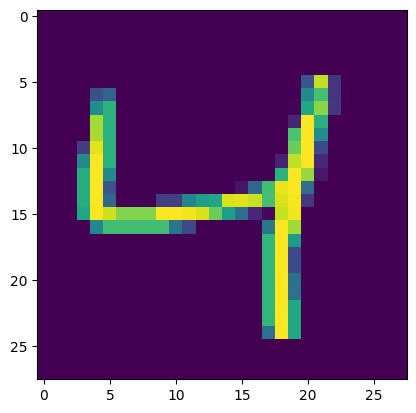

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [32]:
X_train = X_train/255
X_test = X_test/255

In [33]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2790 - accuracy: 0.9193 - val_loss: 0.1424 - val_accuracy: 0.9571
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1238 - accuracy: 0.9631 - val_loss: 0.1223 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0869 - accuracy: 0.9736 - val_loss: 0.1060 - val_accuracy: 0.9683
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9789 - val_loss: 0.1040 - val_accuracy: 0.9694
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.1046 - val_accuracy: 0.9689
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0930 - val_accuracy: 0.9746
Epoch 7/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.1099 - val_accuracy:

In [37]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [38]:
y_pred = y_prob.argmax(axis = 1)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9767

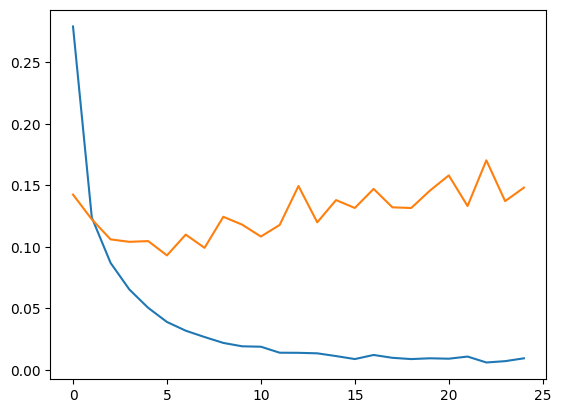

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

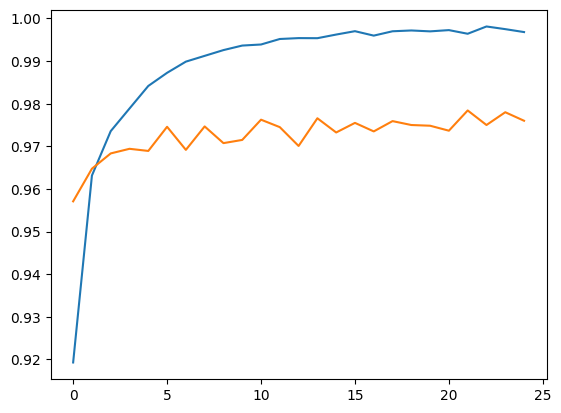

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [43]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis = 1)

1/1 [==============================] - 0s 78ms/step


array([7])